#### Exploratory data analysis and feature engineering using Pandas and Matplotlib


In [1]:
import pandas as pd            # data manipulation and analysis
import numpy as np             # working with arrays
import matplotlib.pyplot as plt # plotting
import seaborn as sns          # data visualization focused on statistical graphics

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(url)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


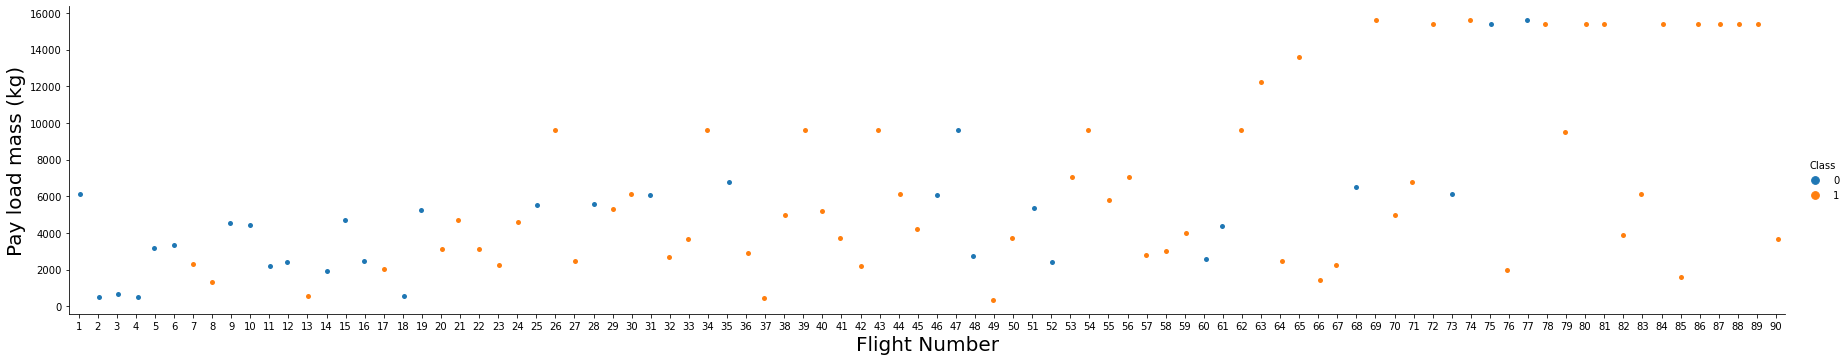

In [2]:
sns.catplot(y = 'PayloadMass', x = 'FlightNumber', hue = 'Class', data = df, aspect = 5)
plt.xlabel('Flight Number', fontsize = 20)
plt.ylabel('Pay load mass (kg)', fontsize = 20)
plt.show()

We see that as additional flights are performed the chances of success are increasing (class 1), whereas as the pay load mass increases our chances of success decrease. The latter is not as apparent for high flight numbers.

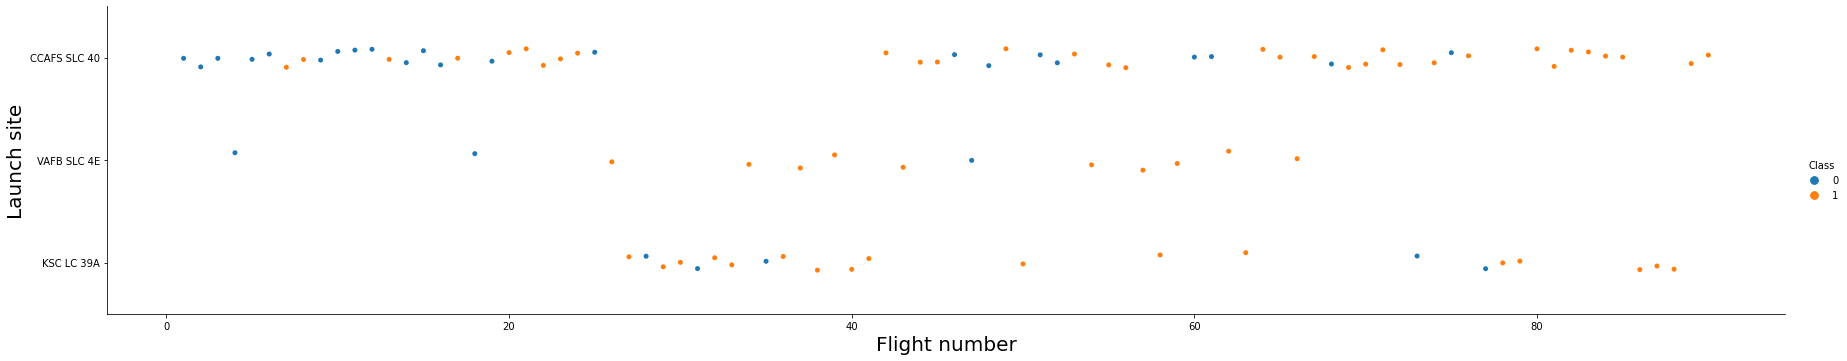

In [3]:
sns.catplot(y = 'LaunchSite', x = 'FlightNumber', hue = 'Class', data = df, aspect = 5)
plt.xlabel('Flight number', fontsize = 20)
plt.ylabel('Launch site', fontsize = 20)
plt.show()

CCAFS has the lowest success rate, while VAFB and KSC are more promising.

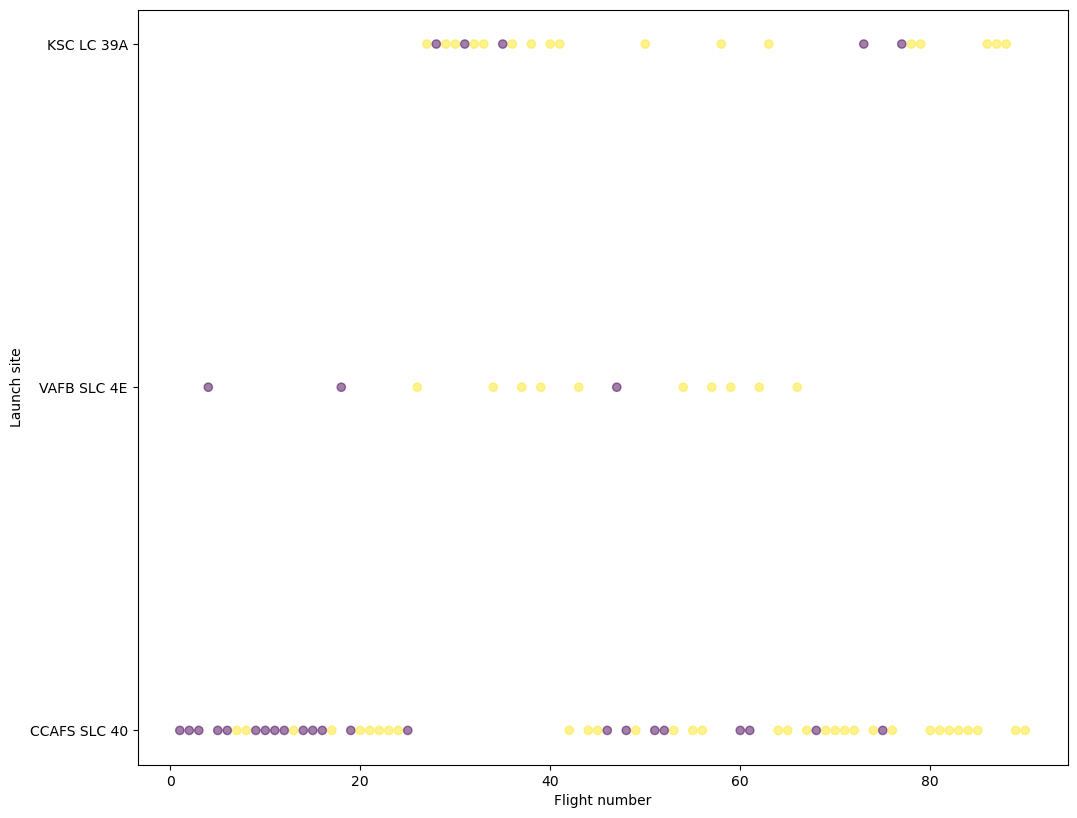

In [4]:
x = np.asanyarray(df['FlightNumber'])
y = np.asanyarray(df['LaunchSite'])
s = np.asanyarray(df['Class'])

from matplotlib.pyplot import figure
figure(figsize = (12,10), dpi = 100)

plt.scatter(x, y, c = s, alpha = 0.5)
plt.xlabel('Flight number')
plt.ylabel('Launch site')
plt.show()

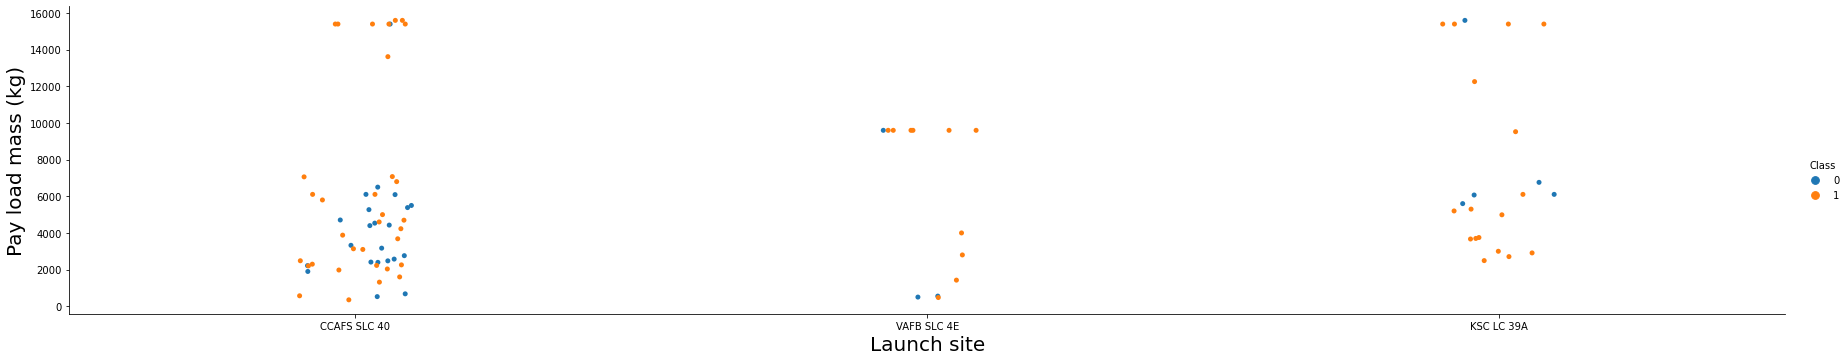

In [5]:
sns.catplot(y = 'PayloadMass', x = 'LaunchSite', hue = 'Class', data = df, aspect = 5)
plt.xlabel('Launch site', fontsize = 20)
plt.ylabel('Pay load mass (kg)', fontsize = 20)
plt.show()

CCAFS has primarily low pay load masses, while KSC has the highest. Furthermore, for the VAFB site there are not rockets launched with very heavy payload mass

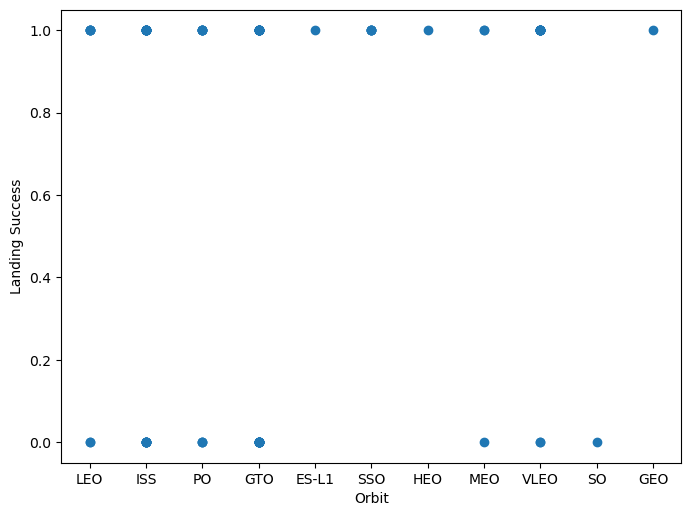

In [6]:
figure(figsize = (8,6), dpi = 100)

plt.scatter(x = np.asanyarray(df['Orbit']), y = np.asanyarray(df['Class']))
plt.xlabel('Orbit')
plt.ylabel('Landing Success')
plt.show()

In [7]:
df_mean_orbit = df.groupby(['Orbit']).mean()
df_mean_orbit.head(11)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class
Orbit,,,,,,,,,,,
ES-L1,13.000000,570.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,-80.577366,28.561857,1.000000
GEO,83.000000,6104.959412,2.000000,1.000000,1.000000,1.000000,5.000000,2.000000,-80.577366,28.561857,1.000000
GTO,35.037037,5011.994444,1.407407,0.629630,0.333333,0.629630,3.037037,0.962963,-80.586229,28.577258,0.518519
HEO,49.000000,350.000000,1.000000,1.000000,0.000000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
ISS,39.142857,3279.938095,1.238095,0.809524,0.238095,0.857143,3.142857,1.285714,-80.583697,28.572857,0.619048
LEO,20.000000,3882.839748,1.000000,0.571429,0.000000,0.714286,2.142857,0.428571,-80.584963,28.575058,0.714286
MEO,77.666667,3987.000000,1.000000,0.666667,0.000000,0.666667,5.000000,0.666667,-80.577366,28.561857,0.666667
PO,36.333333,7583.666667,1.333333,0.888889,0.333333,0.777778,3.222222,1.555556,-120.610829,34.632093,0.666667
SO,73.000000,6104.959412,4.000000,0.000000,1.000000,0.000000,5.000000,3.000000,-80.603956,28.608058,0.000000


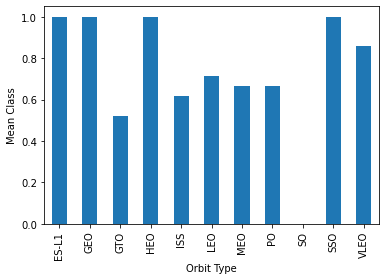

In [8]:
df_mean_orbit.loc[:, 'Class'].plot(kind = 'bar')
plt.xlabel('Orbit Type')
plt.ylabel('Mean Class')
plt.show()

ES-L1, GEO, HEO, and SSO have a 100% success rate, while SO and GTO have the lowest: 0%, and ~50%, respectively.

In [9]:
# this is used to sort values
df_s = df.sort_values(by = ['Orbit'])
df_s

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
12,13,2015-02-11,Falcon 9,570.000000,ES-L1,CCAFS SLC 40,True Ocean,1,True,False,True,NaN,1.0,0,B1013,-80.577366,28.561857,1
82,83,2020-07-20,Falcon 9,6104.959412,GEO,CCAFS SLC 40,True ASDS,2,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1058,-80.577366,28.561857,1
44,45,2018-01-31,Falcon 9,4230.000000,GTO,CCAFS SLC 40,True Ocean,2,True,True,True,NaN,3.0,1,B1032,-80.577366,28.561857,1
23,24,2016-08-14,Falcon 9,4600.000000,GTO,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,2.0,0,B1026,-80.577366,28.561857,1
24,25,2016-09-01,Falcon 9,5500.000000,GTO,CCAFS SLC 40,None ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,3.0,0,B1028,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
73,74,2020-01-29,Falcon 9,15600.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.577366,28.561857,1


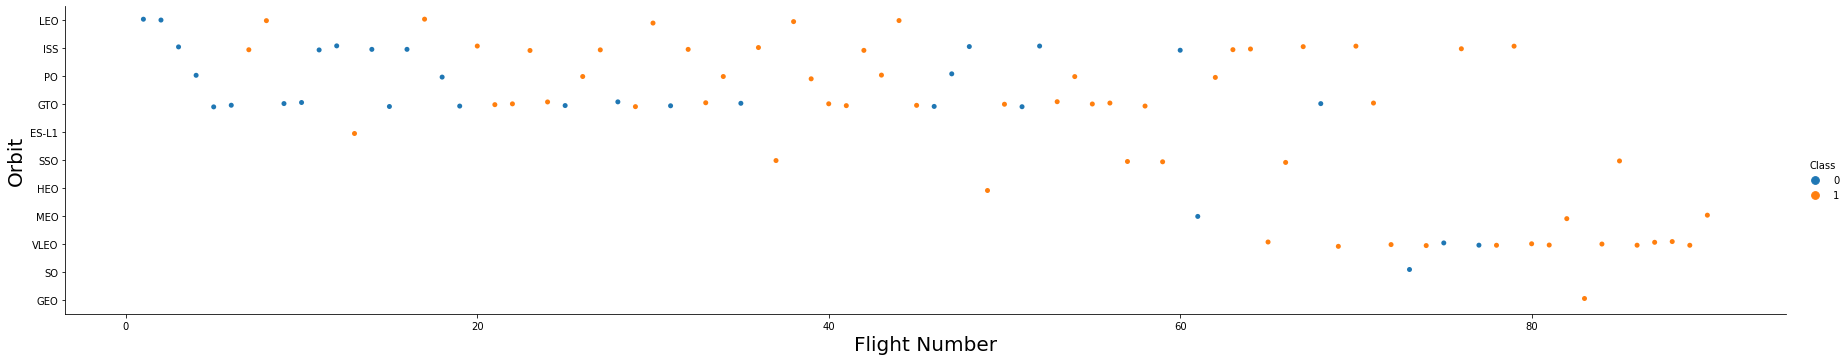

In [10]:
sns.catplot(y = 'Orbit', x = 'FlightNumber', hue = 'Class', data = df, aspect = 5)
plt.xlabel('Flight Number', fontsize = 20)
plt.ylabel('Orbit', fontsize = 20)
plt.show()

Insights should be derived primarily for orbits that have undergone a lot of flights. For some orbits the flight number affects the class.

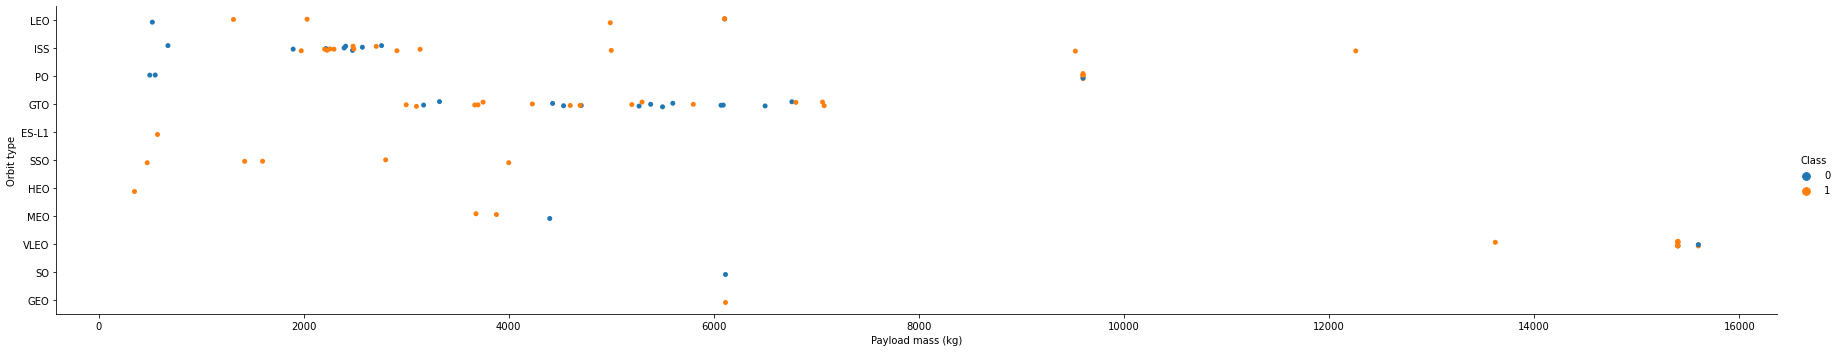

In [11]:
sns.catplot(y = 'Orbit', x = 'PayloadMass', hue = 'Class', data = df, aspect = 5)
plt.xlabel('Payload mass (kg)')
plt.ylabel('Orbit type')
plt.show()

In [12]:
# a function to extract years from Date
year = []

def Extract_year():
    for i in df['Date']:
        year.append(i.split('-')[0])
    return year

Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [13]:
df = df.astype({'Date':'int'})
df_line = df.loc[:, ['Date', 'Class']]
df_line.set_index('Date', inplace = True)
df_line

,Class
Date,
2010,0
2012,0
2013,0
2013,0
2013,0
...,...
2020,1
2020,1
2020,1


<AxesSubplot:xlabel='Date'>

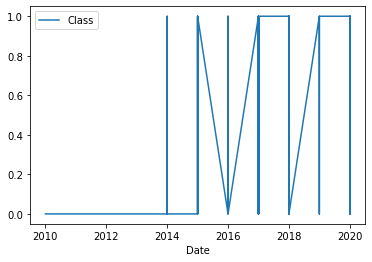

In [14]:
df_line.plot(kind = 'line')

Features Engineering:

In [15]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [16]:
features_one_hot = pd.get_dummies(features[['Orbit', 'LaunchSite', 'LandingPad', 'Serial']], dtype = float)
features_one_hot

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
